In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
file_path = r'D:\Learning\Jupyter\supervised+Learning+code+and+datasets\W_ClothingReview.csv'
store_data = pd.read_csv(file_path, index_col=False)

In [3]:
# Basic data details 
print('No of columns: {} and No of Records: {}'.format(store_data.shape[0], store_data.shape[1]))
print('\n')
store_data

No of columns: 23486 and No of Records: 11




,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
store_data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
# Removing the space from column name
store_data.columns = store_data.columns.str.replace(' ', '_').str.upper()
store_data.head()

,UNNAMED:_0,CLOTHING_ID,AGE,TITLE,REVIEW_TEXT,RATING,RECOMMENDED_IND,POSITIVE_FEEDBACK_COUNT,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
# We will not consider the first column i.e., Unnamed as this is the index column 
data = store_data.iloc[:,1:]
data.head()

,CLOTHING_ID,AGE,TITLE,REVIEW_TEXT,RATING,RECOMMENDED_IND,POSITIVE_FEEDBACK_COUNT,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
# NAN count
nan_df = data.isnull().sum()
nan_df =pd.DataFrame(nan_df, columns=['NaN_Counts'])
nan_df['NAN_Percentage'] = nan_df['NaN_Counts']/data.shape[0]*100
nan_df

,NaN_Counts,NAN_Percentage
CLOTHING_ID,0,0.000000
AGE,0,0.000000
TITLE,3810,16.222430
REVIEW_TEXT,845,3.597888
RATING,0,0.000000
RECOMMENDED_IND,0,0.000000
POSITIVE_FEEDBACK_COUNT,0,0.000000
DIVISION_NAME,14,0.059610
DEPARTMENT_NAME,14,0.059610
CLASS_NAME,14,0.059610


In [8]:
# Checking the information like dtype and length
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CLOTHING_ID              23486 non-null  int64 
 1   AGE                      23486 non-null  int64 
 2   TITLE                    19676 non-null  object
 3   REVIEW_TEXT              22641 non-null  object
 4   RATING                   23486 non-null  int64 
 5   RECOMMENDED_IND          23486 non-null  int64 
 6   POSITIVE_FEEDBACK_COUNT  23486 non-null  int64 
 7   DIVISION_NAME            23472 non-null  object
 8   DEPARTMENT_NAME          23472 non-null  object
 9   CLASS_NAME               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


__Observations__
- Numeric columns: CLOTHING_ID, AGE, RATING, RECOMMENDED_IND, POSITIVE_FEEDBACK_COUNT
- Categorical columns: TITLE, REVIEW_TEXT, DIVISION_NAME, DEPARTMENT_NAME, CLASS_NAME
- NAN values is available in few columns 

In [9]:
# Descriptive results for the numerical features
data.describe()

,CLOTHING_ID,AGE,RATING,RECOMMENDED_IND,POSITIVE_FEEDBACK_COUNT
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


__Observations__
- AGE feture contains outliers 
- Maximum of the customer are given rating 4 but there is few rating as 1 this needs to be analysed further
- Need further analysis for RECOMMENDED_IND and POSITIVE_FEEDBACK_COUNT

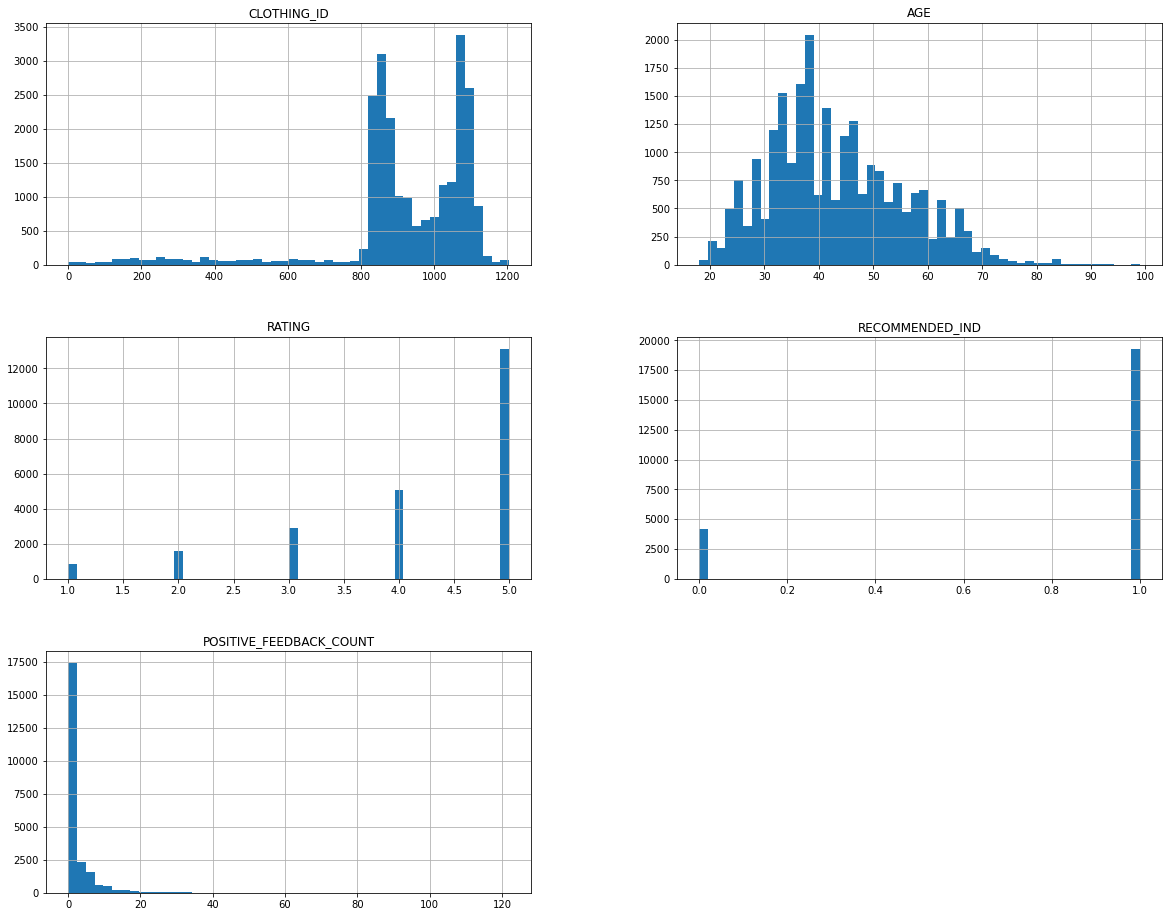

In [10]:
# checking the data distribution for the numerical features 
numerical_features = [col for col in data.columns if data[col].dtype !='O']
data[numerical_features].hist(bins=50, figsize=(20,16));

In [11]:
# Categorical columns 
categorical_features = [col for col in data.columns if data[col].dtype == 'O']

# not considering the tReview_text column
categorical_features.remove('REVIEW_TEXT')
categorical_features

['TITLE', 'DIVISION_NAME', 'DEPARTMENT_NAME', 'CLASS_NAME']

In [12]:
# distinct values in each categorical features
for col in categorical_features:
    print(col.upper())
    print('*'*40)
    print(data[col].value_counts())
    print('\n')

TITLE
****************************************
Love it!                         136
Beautiful                         95
Love                              88
Love!                             84
Beautiful!                        72
                                ... 
These stretch out horribly         1
Casual and cute tunic              1
Cute but can add love handles      1
Curves for days!                   1
Cute shirt for work or play        1
Name: TITLE, Length: 13993, dtype: int64


DIVISION_NAME
****************************************
General           13850
General Petite     8120
Initmates          1502
Name: DIVISION_NAME, dtype: int64


DEPARTMENT_NAME
****************************************
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: DEPARTMENT_NAME, dtype: int64


CLASS_NAME
****************************************
Dresses           6319
Knits             4843
Blouses           3097
Sweaters        

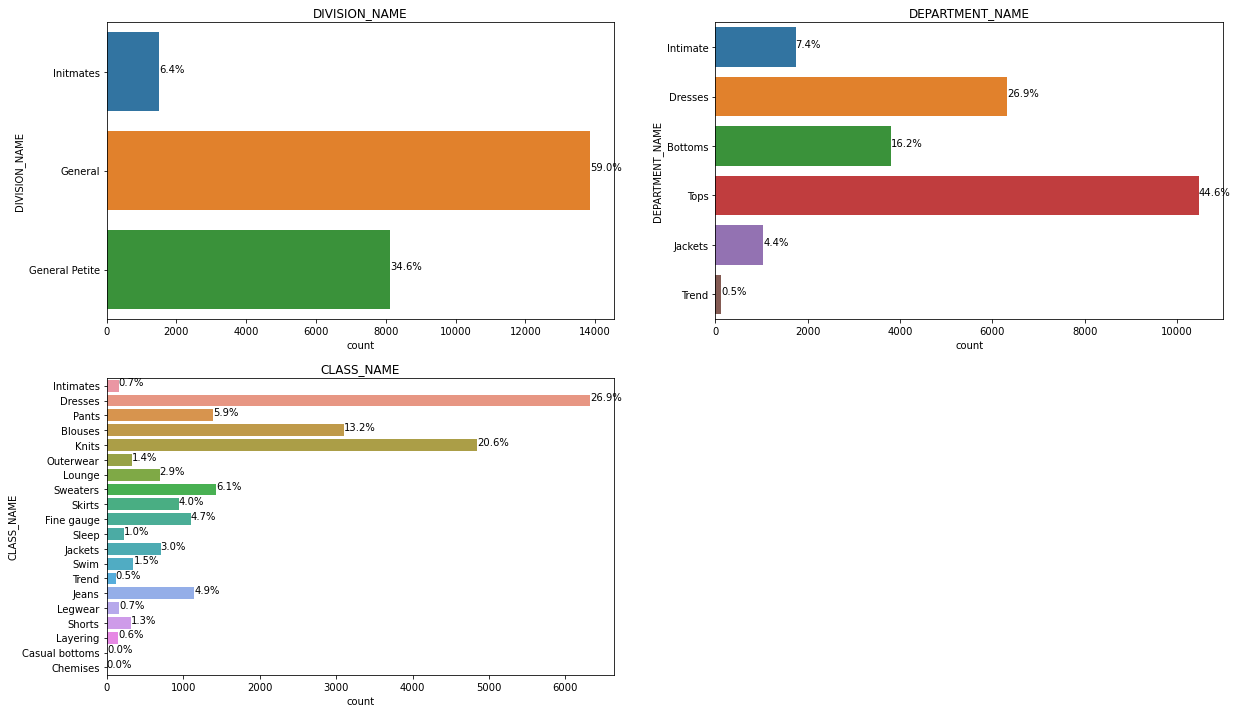

In [13]:
# Ploting the count plot 
plt.figure(figsize=(20,12))

for i, col in enumerate(['DIVISION_NAME', 'DEPARTMENT_NAME', 'CLASS_NAME']):
    plt.subplot(2,2,i+1)  
    ax = sns.countplot(y=data[col])
    plt.title(col)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(data))
        x = p.get_x() + p.get_width()+0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

__Observations__
- Division Name has three segment, General contains the higest record.
- Department Name has six segment, tops contains the highest record.
- Calss Name has 20 unique segement, dresses contains the highest records.

__Univarinat Analysis__
- Title
- Review Text

In [14]:
# Creating a backup of actual dataframe
original_data = data.copy()

In [15]:
#data = original_data.copy()

In [16]:
# Converting the Title and Review text into string data type
data['TITLE'] = data['TITLE'].astype('str')
data['REVIEW_TEXT'] = data['REVIEW_TEXT'].astype('str')

# Creating a new columns with len of title and review text 
data['TITLE_LEN'] = data['TITLE'].apply(lambda x: 0 if x == 'nan' else len(x))
data['REVIEW_TEXT_LEN'] = data['REVIEW_TEXT'].apply(lambda x: 0 if x == 'nan' else len(x))

In [17]:
data.head()

,CLOTHING_ID,AGE,TITLE,REVIEW_TEXT,RATING,RECOMMENDED_IND,POSITIVE_FEEDBACK_COUNT,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,TITLE_LEN,REVIEW_TEXT_LEN
0,767,33,nan,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0,53
1,1080,34,nan,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,192


In [18]:
data['TITLE'].value_counts()

nan                              3810
Love it!                          136
Beautiful                          95
Love                               88
Love!                              84
                                 ... 
Casual and cute tunic               1
Cute but can add love handles       1
Curves for days!                    1
Falling for fringe                  1
Cute shirt for work or play         1
Name: TITLE, Length: 13994, dtype: int64

In [19]:
data['TITLE'].unique()

array(['nan', 'Some major design flaws', 'My favorite buy!', ...,
       'Cute, but see through',
       'Very cute dress, perfect for summer parties and we',
       'Please make more like this one!'], dtype=object)

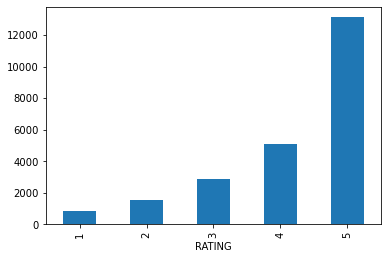

In [20]:
data.groupby(by='RATING')['TITLE_LEN'].count().plot(kind='bar');

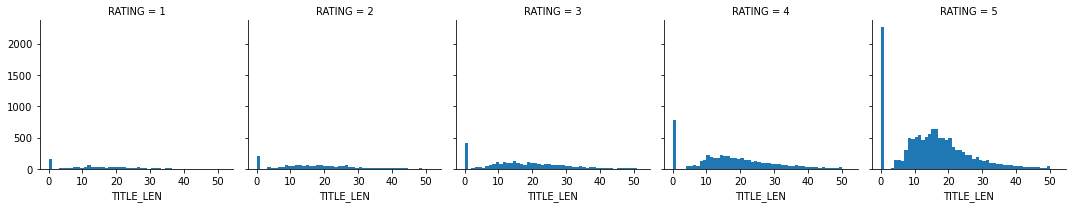

In [21]:
g = sns.FacetGrid(data=data, col='RATING')
g.map(plt.hist, 'TITLE_LEN', bins=50);

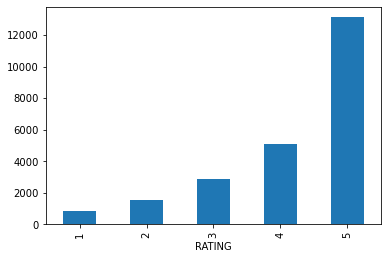

In [22]:
data.groupby(by='RATING')['REVIEW_TEXT_LEN'].count().plot(kind='bar');

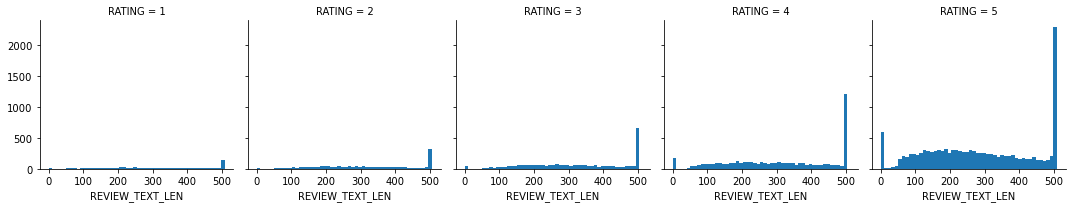

In [23]:
g = sns.FacetGrid(data=data, col='RATING')
g.map(plt.hist, 'REVIEW_TEXT_LEN', bins=50);

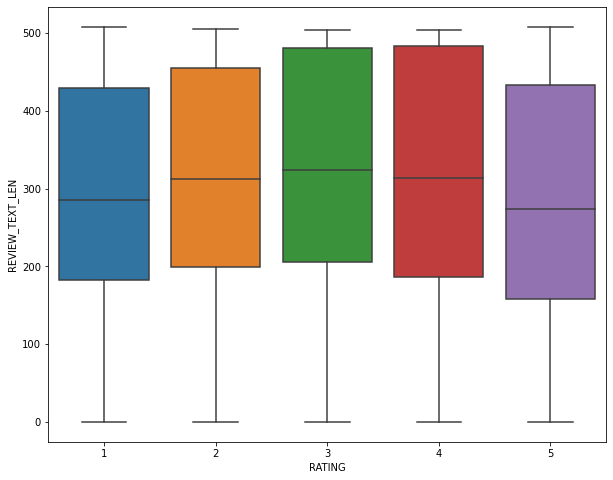

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(x='RATING', y= 'REVIEW_TEXT_LEN', data=data);

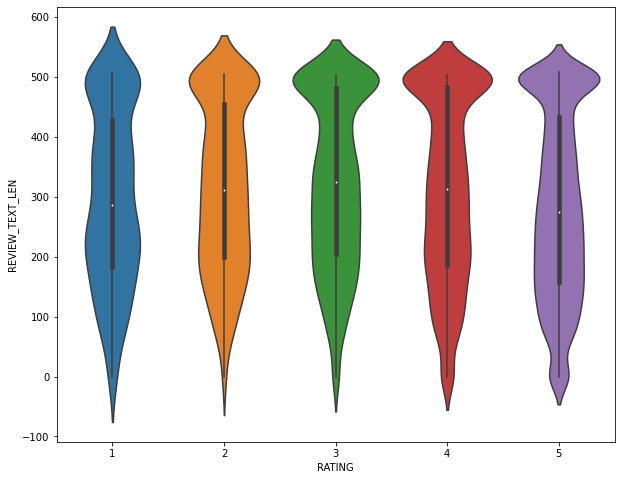

In [26]:
plt.figure(figsize=(10,8))
sns.violinplot(x='RATING', y= 'REVIEW_TEXT_LEN', data=data);

__Observation__
- Title length and Review Text Length is directly propotional to Rating
- Rating 5 is more common

## Bivariant Analysis

In [32]:
# Checking the linear correlation within available features
rating_corr = data.groupby(by='RATING').mean().corr()
rating_corr

,CLOTHING_ID,AGE,RECOMMENDED_IND,POSITIVE_FEEDBACK_COUNT,TITLE_LEN,REVIEW_TEXT_LEN
CLOTHING_ID,1.000000,-0.977686,-0.303355,0.378828,0.984490,0.975110
AGE,-0.977686,1.000000,0.115681,-0.194958,-0.950433,-0.930753
RECOMMENDED_IND,-0.303355,0.115681,1.000000,-0.987748,-0.310295,-0.309365
POSITIVE_FEEDBACK_COUNT,0.378828,-0.194958,-0.987748,1.000000,0.367999,0.385765
TITLE_LEN,0.984490,-0.950433,-0.310295,0.367999,1.000000,0.984607
REVIEW_TEXT_LEN,0.975110,-0.930753,-0.309365,0.385765,0.984607,1.000000


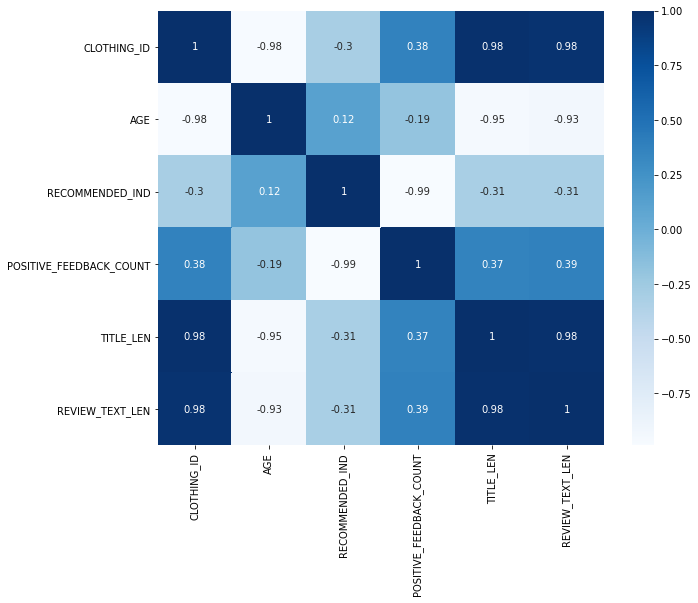

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(rating_corr, annot=True, cmap='Blues');

In [39]:
# Checking the non linear correlation within available features
rating_corr_sp = data.groupby(by='RATING').mean().corr(method='spearman')
rating_corr_sp

,CLOTHING_ID,AGE,RECOMMENDED_IND,POSITIVE_FEEDBACK_COUNT,TITLE_LEN,REVIEW_TEXT_LEN
CLOTHING_ID,1.0,-0.9,-0.3,0.3,1.0,1.0
AGE,-0.9,1.0,-0.1,0.1,-0.9,-0.9
RECOMMENDED_IND,-0.3,-0.1,1.0,-1.0,-0.3,-0.3
POSITIVE_FEEDBACK_COUNT,0.3,0.1,-1.0,1.0,0.3,0.3
TITLE_LEN,1.0,-0.9,-0.3,0.3,1.0,1.0
REVIEW_TEXT_LEN,1.0,-0.9,-0.3,0.3,1.0,1.0


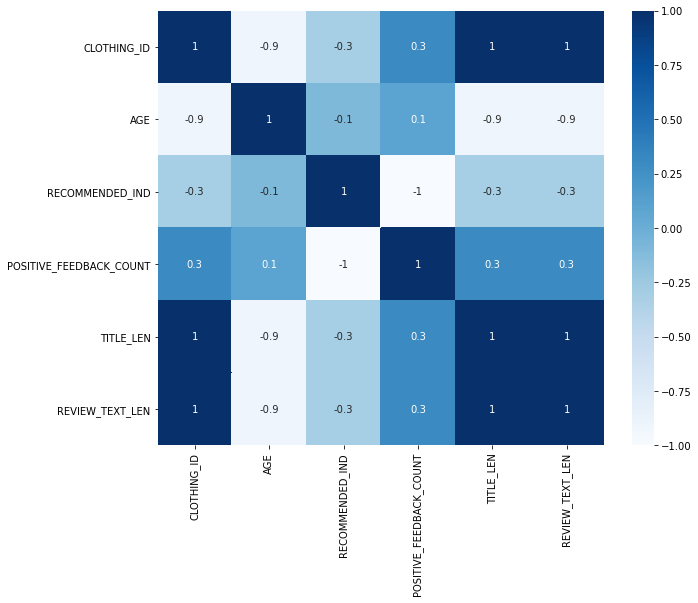

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(rating_corr_sp, annot=True, cmap='Blues');

__Observation__
- Title len and Review Text lenght are higly correleted 
- No other features are having significant correlation

In [165]:
data.head()

,CLOTHING_ID,AGE,TITLE,REVIEW_TEXT,RATING,RECOMMENDED_IND,POSITIVE_FEEDBACK_COUNT,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,TITLE_LEN,REVIEW_TEXT_LEN
0,767,33,nan,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0,53
1,1080,34,nan,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,192


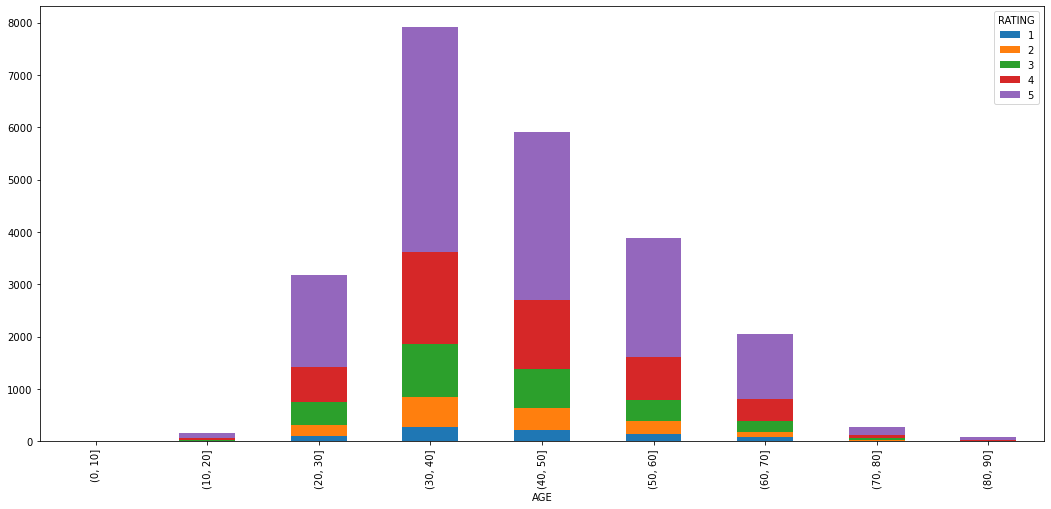

In [198]:
data.groupby(['RATING', pd.cut(data['AGE'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True,figsize=(18,8));

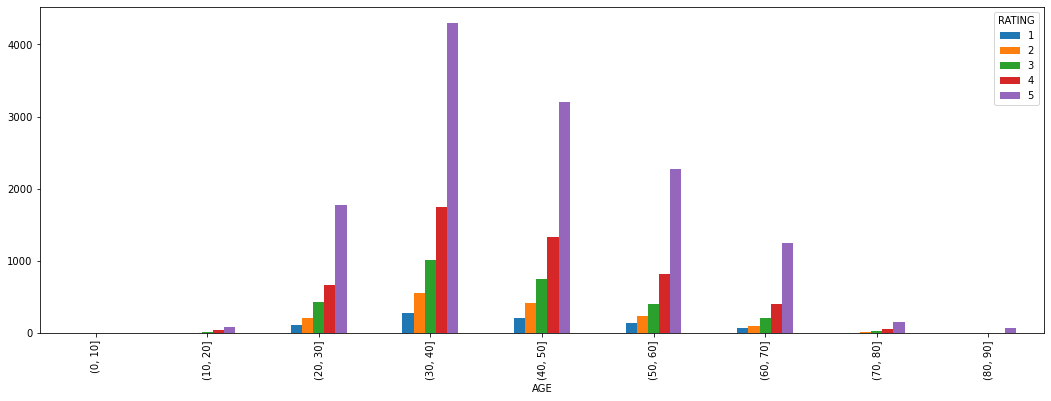

In [199]:
data.groupby(['RATING', pd.cut(data['AGE'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar', figsize=(18,6));

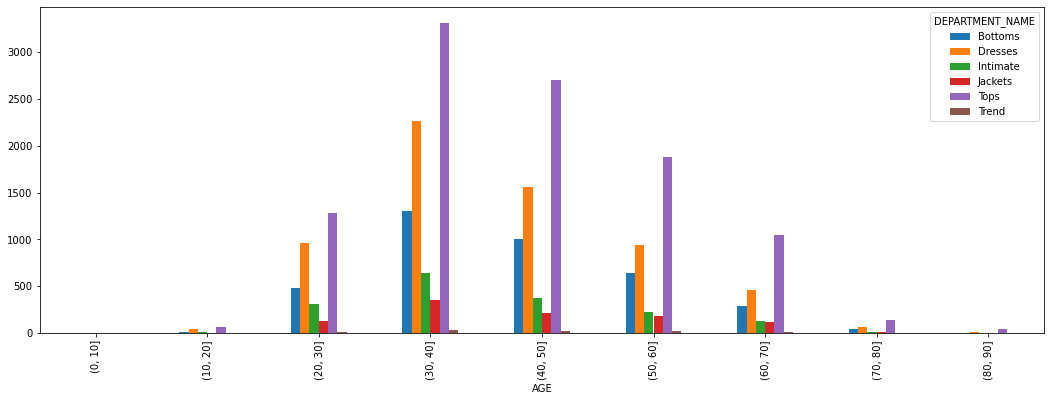

In [200]:
data.groupby(['DEPARTMENT_NAME', pd.cut(data['AGE'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar', figsize=(18,6));

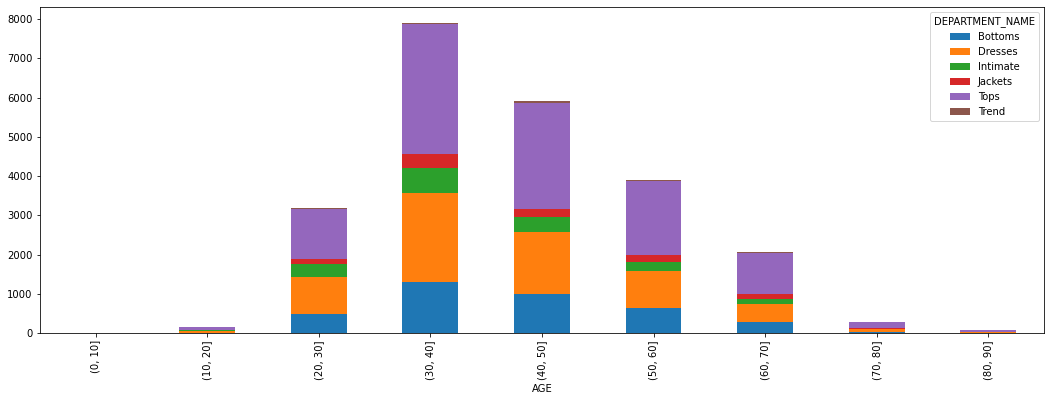

In [194]:
data.groupby(['DEPARTMENT_NAME', pd.cut(data['AGE'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar', stacked=True, figsize=(18,6));

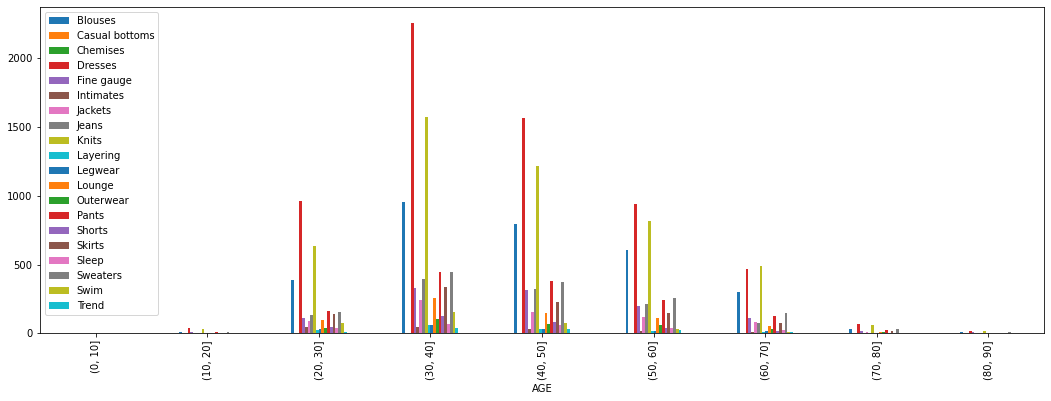

In [193]:
data.groupby(['CLASS_NAME', pd.cut(data['AGE'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar', figsize=(18,6));
plt.legend(loc=2);

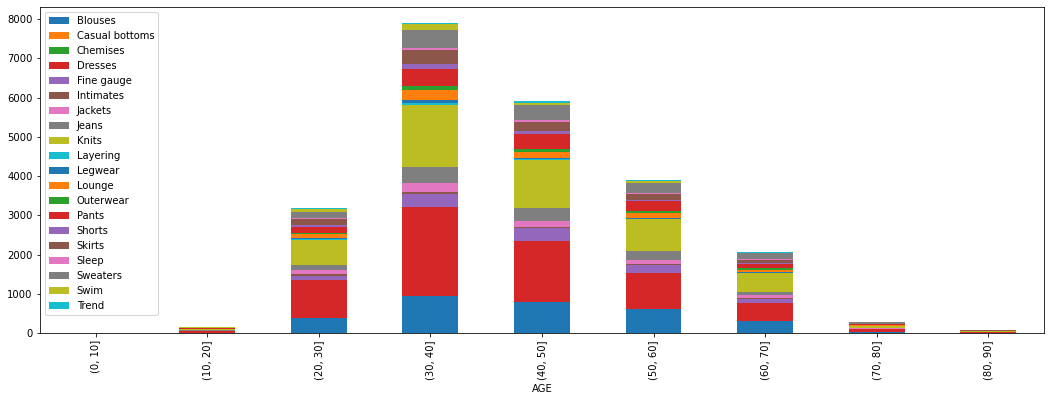

In [195]:
data.groupby(['CLASS_NAME', pd.cut(data['AGE'], np.arange(0,100,10))]).size().unstack(0).plot(kind='bar',stacked=True , figsize=(18,6));
plt.legend(loc=2);

## NLP Analysis for the Review Text feature

In [70]:
# Importing the required libraries 
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import re

In [66]:
a = data['REVIEW_TEXT'].str.lower().str.cat(sep=' ')

#Tokenizing the word
words =word_tokenize(a)

#Removing the punctuation,Numbers and returing the list of words
word_no_punc = []
for w in words:
    if w.isalpha():
        word_no_punc.append(w)

#Removing stop words
stopwords = stopwords.words("english")

clean_words = []
for w in word_no_punc:
    if w not in stopwords:
        clean_words.append(w)

In [43]:
#Calculate the frequency distribution
word_dict = nltk.FreqDist(clean_words)
result_df = pd.DataFrame(word_dict.most_common(100), columns=['Word', 'Frequency'])

result_df.head(10)

,Word,Frequency
0,dress,10497
1,love,8940
2,size,8700
3,top,7348
4,fit,7274
5,like,7010
6,wear,6422
7,great,6100
8,would,5428
9,fabric,4777


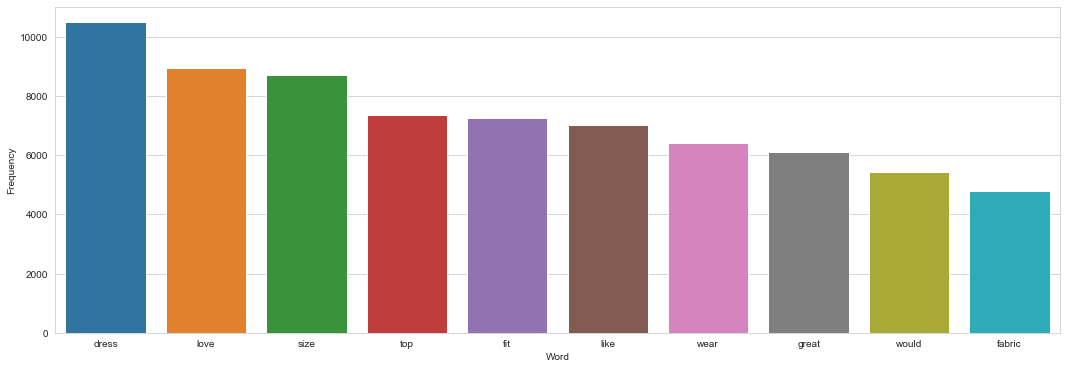

In [44]:
# Visualization
plt.figure(figsize=(18,6))
sns.set_style("whitegrid")
ax = sns.barplot(x='Word', y='Frequency', data=result_df.head(10))

In [45]:
# Word Cloud 
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

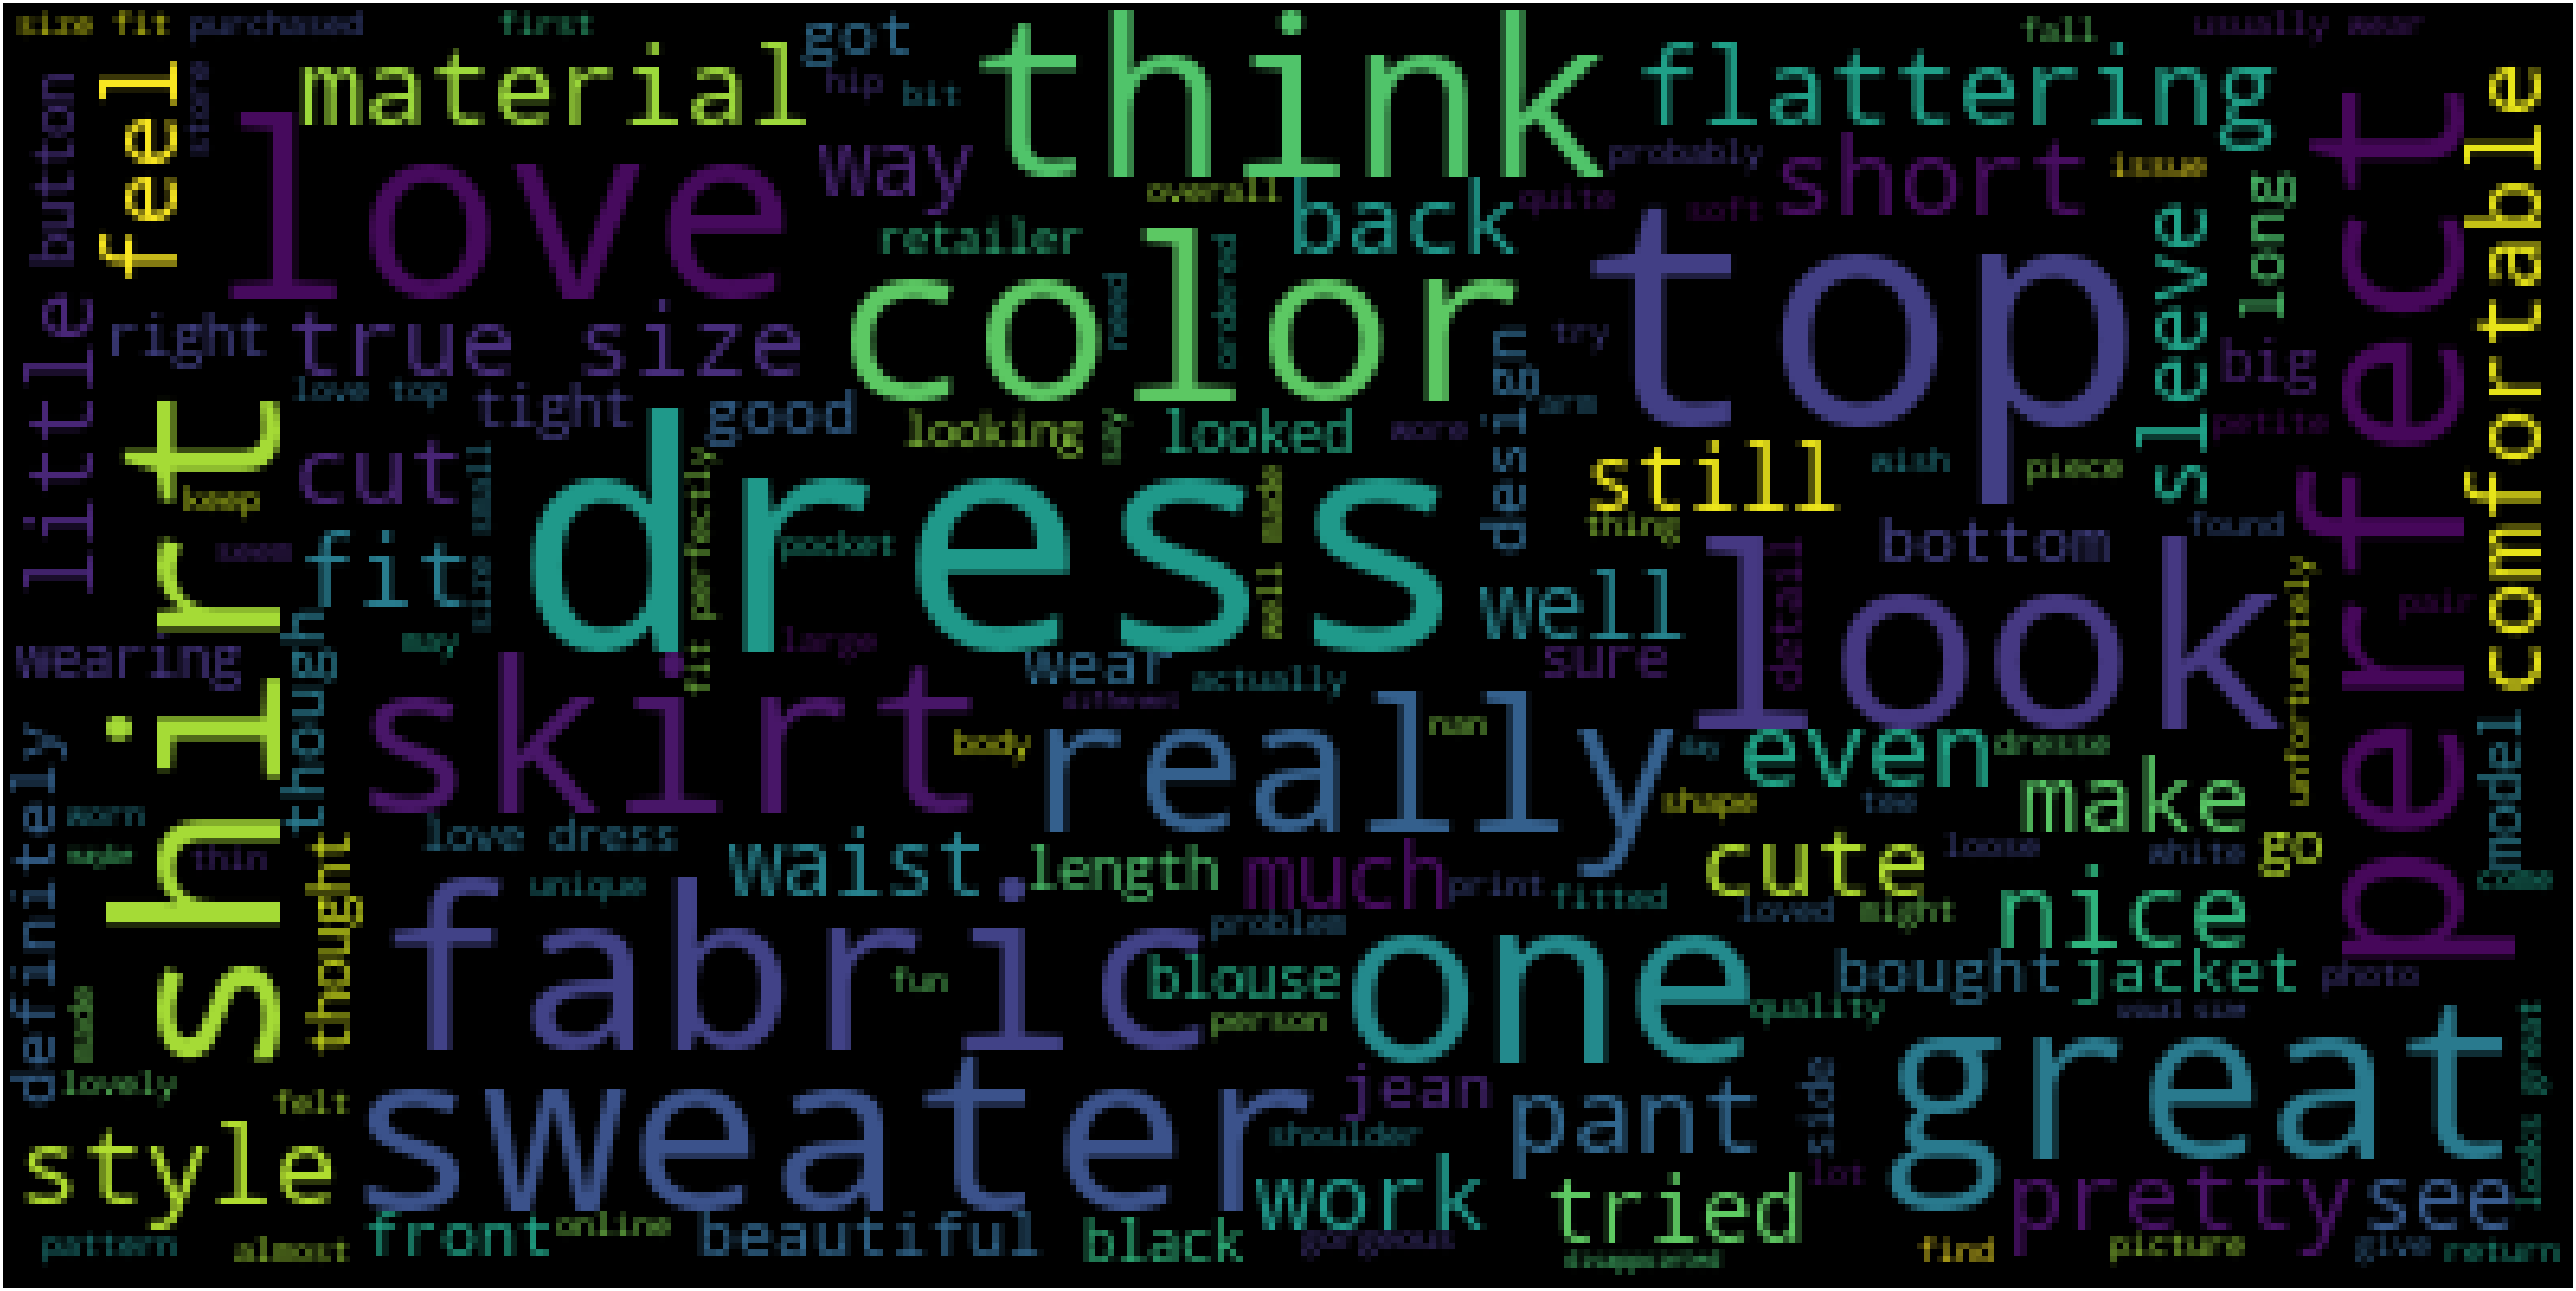

In [46]:
wc(clean_words, 'black', 'Most Used Words')

## Word Sentiment 

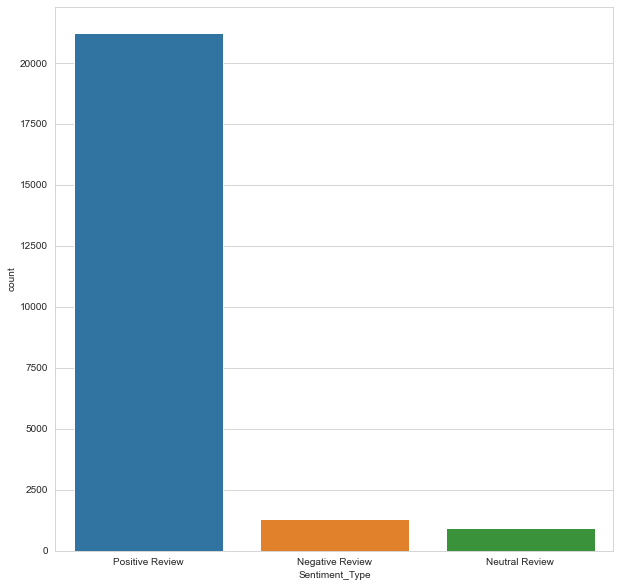

In [47]:
from textblob import TextBlob

bloblist_desc = list()

df_review_str=data['REVIEW_TEXT'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)


In [50]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [56]:
df_polarity_desc.head()

,Review,sentiment,polarity,Sentiment_Type
0,Absolutely wonderful - silky and sexy and comf...,0.633333,0.933333,Positive Review
1,Love this dress! it's sooo pretty. i happene...,0.339583,0.725000,Positive Review
2,I had such high hopes for this dress and reall...,0.073675,0.356294,Positive Review
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,0.625000,Positive Review
4,This shirt is very flattering to all due to th...,0.512891,0.568750,Positive Review


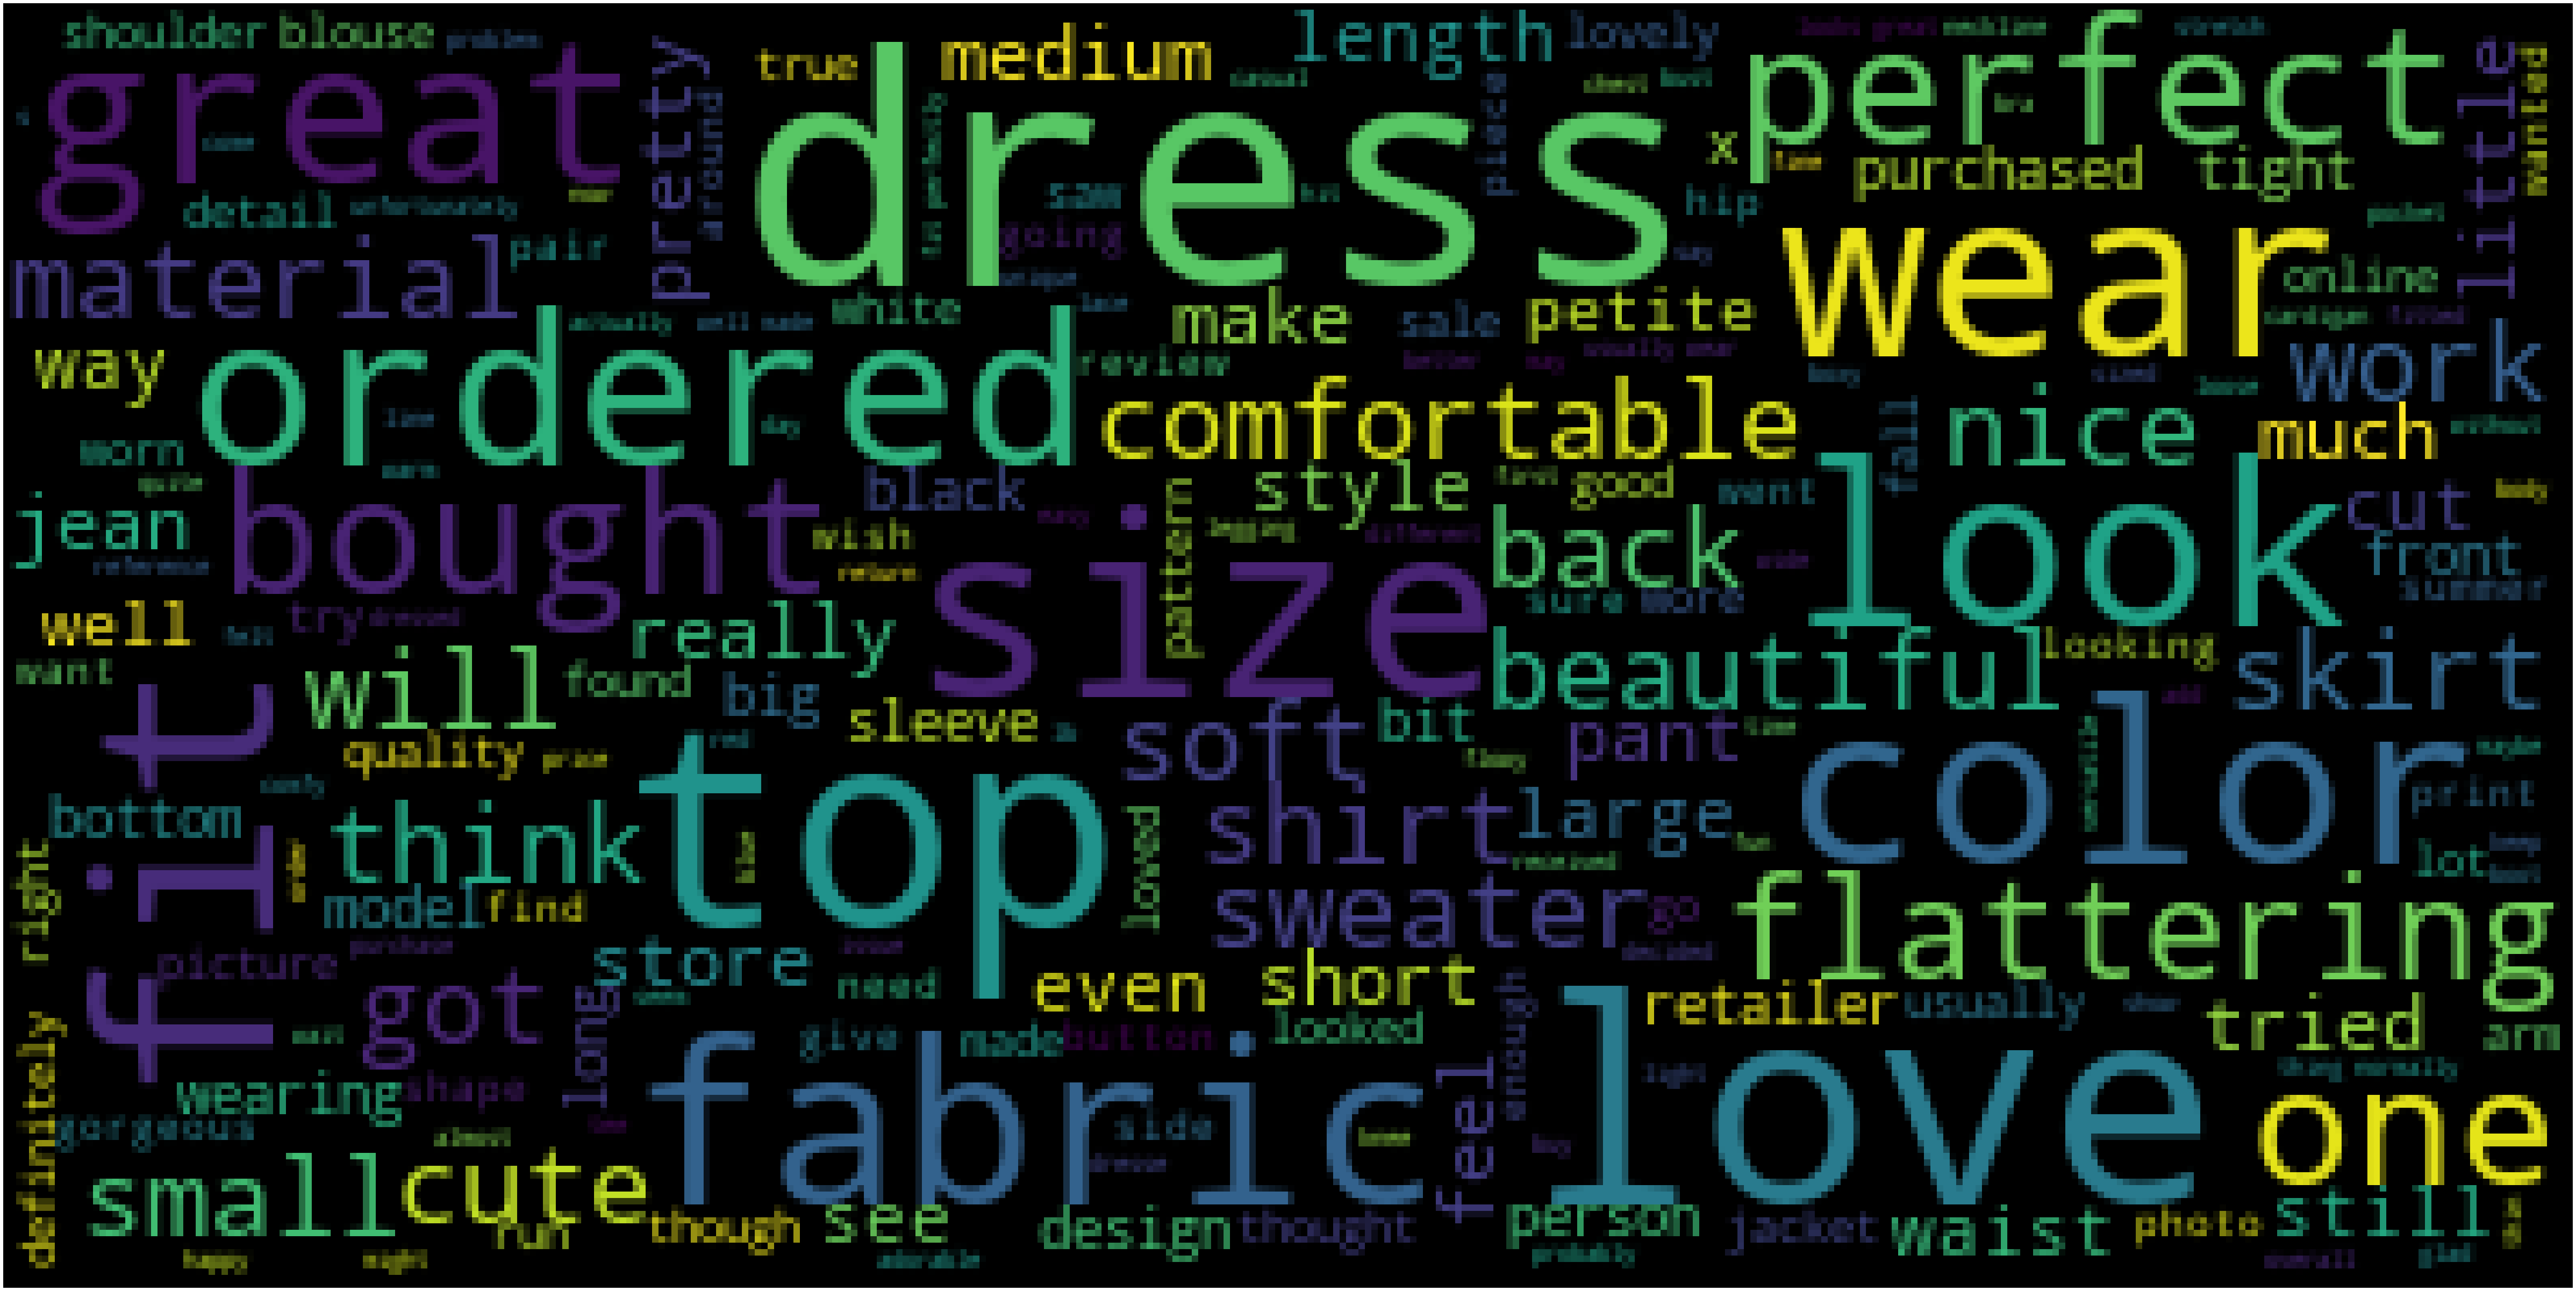

In [55]:
wc(positive_reviews['Review'], 'black', 'Most positive words')

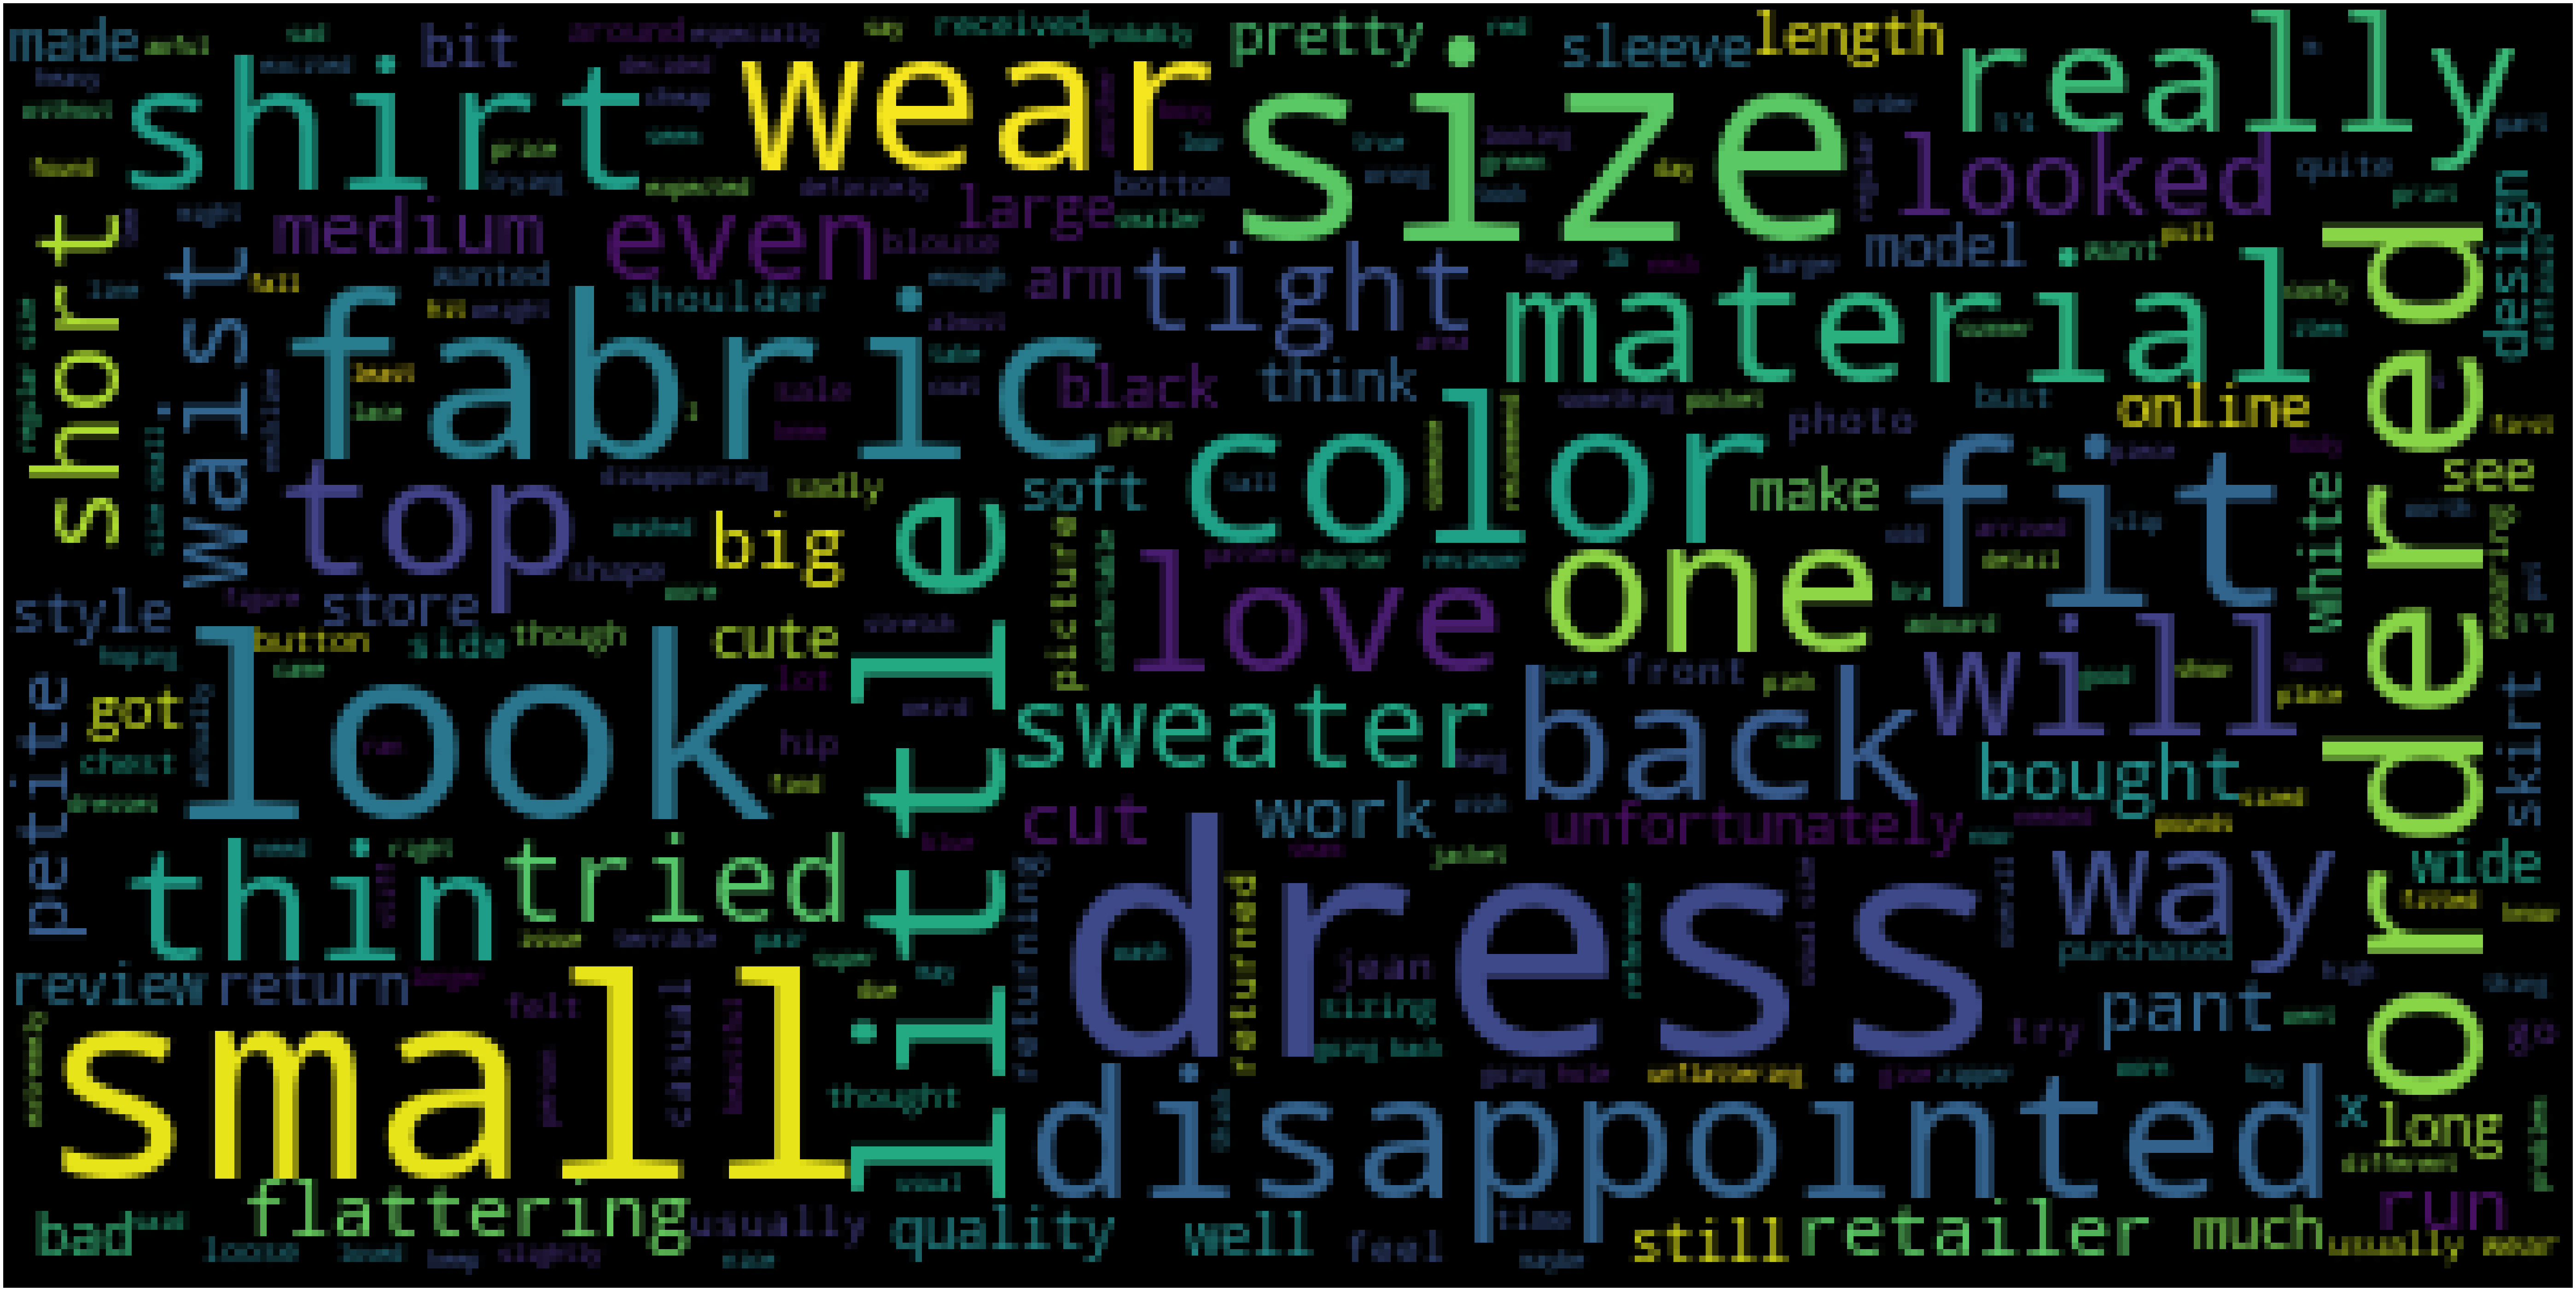

In [57]:
wc(negative_reviews['Review'], 'black', 'Most negative words')

In [71]:
import string
def text_process(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [72]:
data['REVIEW_TEXT'].head(5).apply(text_process)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: REVIEW_TEXT, dtype: object

## Vectorization

In [73]:
df = data.copy()

In [74]:
df=df.dropna(axis=0,how='any')
rating_class = df[(df['RATING'] == 1) | (df['RATING'] == 5)]
X_review=rating_class['REVIEW_TEXT']
y=rating_class['RATING']

In [78]:
rating_class.RATING.value_counts()

5    13117
1      842
Name: RATING, dtype: int64

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=text_process).fit(X_review)

In [76]:
print(len(bow_transformer.vocabulary_))

14686


In [ ]:
X_review = bow_transformer.transform(X_review)

### Training and Test data

In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_review, y, test_size=0.3, random_state=101)

In [291]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [292]:
predict=nb.predict(X_test)

In [293]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[  86  159]
 [  12 3931]]


              precision    recall  f1-score   support

           1       0.88      0.35      0.50       245
           5       0.96      1.00      0.98      3943

    accuracy                           0.96      4188
   macro avg       0.92      0.67      0.74      4188
weighted avg       0.96      0.96      0.95      4188



In [296]:
# Testing the model
rating_positive=df['REVIEW_TEXT'][3]
rating_positive

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [297]:
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

5

In [299]:
rating_negative=df['REVIEW_TEXT'][61]
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [300]:
rating_positive_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_positive_transformed)[0]

1

**Now, I want to predict which product is recommended and which is not**

In [304]:
X_predict_recommend=df['REVIEW_TEXT']
y_recommend=df['RECOMMENDED_IND']

bow_transformer=CountVectorizer(analyzer=text_process).fit(X_predict_recommend)

X_predict_recommend = bow_transformer.transform(X_predict_recommend)

X_train, X_test, y_train, y_test = train_test_split(X_predict_recommend, y_recommend, test_size=0.3, random_state=101)

nb = MultinomialNB()
nb.fit(X_train, y_train)

predict_recommendation=nb.predict(X_test)


print(confusion_matrix(y_test, predict_recommendation))
print('\n')
print(classification_report(y_test, predict_recommendation))

[[ 741  513]
 [ 298 5490]]


              precision    recall  f1-score   support

           0       0.71      0.59      0.65      1254
           1       0.91      0.95      0.93      5788

    accuracy                           0.88      7042
   macro avg       0.81      0.77      0.79      7042
weighted avg       0.88      0.88      0.88      7042



In [305]:
print(rating_positive)
rating_positive_transformed = bow_transformer.transform([rating_positive])
nb.predict(rating_positive_transformed)[0]

I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!


1

In [306]:
print(rating_negative)
rating_positive_transformed = bow_transformer.transform([rating_negative])
nb.predict(rating_positive_transformed)[0]

3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!


0